In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Loading The Dataset

In [2]:
df= pd.read_csv("Darknet_Data.csv")
pd.set_option('display.max_columns', None)
df.shape

(141530, 85)

In [3]:
df.columns

Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Len

### Cleaning Data

In [4]:
df = df.replace([np.inf, -np.inf], np.nan)
print(df)

                                           Flow ID          Src IP  Src Port  \
0          10.152.152.11-216.58.220.99-57158-443-6   10.152.152.11     57158   
1          10.152.152.11-216.58.220.99-57159-443-6   10.152.152.11     57159   
2          10.152.152.11-216.58.220.99-57160-443-6   10.152.152.11     57160   
3         10.152.152.11-74.125.136.120-49134-443-6   10.152.152.11     49134   
4       10.152.152.11-173.194.65.127-34697-19305-6   10.152.152.11     34697   
...                                            ...             ...       ...   
141525        10.8.8.246-224.0.0.252-55219-5355-17      10.8.8.246     55219   
141526        10.8.8.246-224.0.0.252-64207-5355-17      10.8.8.246     64207   
141527        10.8.8.246-224.0.0.252-61115-5355-17      10.8.8.246     61115   
141528        10.8.8.246-224.0.0.252-64790-5355-17      10.8.8.246     64790   
141529    80.239.235.110-10.8.8.246-11666-60245-17  80.239.235.110     11666   

                Dst IP  Dst Port  Proto

In [5]:
pd.set_option("max_rows", None)
df.isnull().sum()

Flow ID                        0
Src IP                         0
Src Port                       0
Dst IP                         0
Dst Port                       0
Protocol                       0
Timestamp                      0
Flow Duration                  0
Total Fwd Packet               0
Total Bwd packets              0
Total Length of Fwd Packet     0
Total Length of Bwd Packet     0
Fwd Packet Length Max          0
Fwd Packet Length Min          0
Fwd Packet Length Mean         0
Fwd Packet Length Std          0
Bwd Packet Length Max          0
Bwd Packet Length Min          0
Bwd Packet Length Mean         0
Bwd Packet Length Std          0
Flow Bytes/s                  49
Flow Packets/s                49
Flow IAT Mean                  0
Flow IAT Std                   0
Flow IAT Max                   0
Flow IAT Min                   0
Fwd IAT Total                  0
Fwd IAT Mean                   0
Fwd IAT Std                    0
Fwd IAT Max                    0
Fwd IAT Mi

In [6]:
df['Flow Bytes/s'].fillna((df['Flow Bytes/s'].median()),inplace=True)
df['Flow Packets/s'].fillna((df['Flow Packets/s'].median()),inplace=True)
df.isnull().sum()

Flow ID                       0
Src IP                        0
Src Port                      0
Dst IP                        0
Dst Port                      0
Protocol                      0
Timestamp                     0
Flow Duration                 0
Total Fwd Packet              0
Total Bwd packets             0
Total Length of Fwd Packet    0
Total Length of Bwd Packet    0
Fwd Packet Length Max         0
Fwd Packet Length Min         0
Fwd Packet Length Mean        0
Fwd Packet Length Std         0
Bwd Packet Length Max         0
Bwd Packet Length Min         0
Bwd Packet Length Mean        0
Bwd Packet Length Std         0
Flow Bytes/s                  0
Flow Packets/s                0
Flow IAT Mean                 0
Flow IAT Std                  0
Flow IAT Max                  0
Flow IAT Min                  0
Fwd IAT Total                 0
Fwd IAT Mean                  0
Fwd IAT Std                   0
Fwd IAT Max                   0
Fwd IAT Min                   0
Bwd IAT 

In [7]:
df = df.drop_duplicates()
df.shape

(117056, 85)

In [8]:
df.describe(include='all')

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
count,117056,117056,117056.000000,117056,117056.000000,117056.000000,117056,1.170560e+05,117056.000000,117056.000000,1.170560e+05,1.170560e+05,117056.000000,117056.000000,117056.000000,117056.000000,117056.000000,117056.000000,117056.000000,117056.000000,1.170560e+05,1.170560e+05,1.170560e+05,1.170560e+05,1.170560e+05,1.170560e+05,1.170560e+05,1.170560e+05,1.170560e+05,1.170560e+05,1.170560e+05,1.170560e+05,1.170560e+05,1.170560e+05,1.170560e+05,1.170560e+05,117056.000000,117056.0,117056.0,117056.0,1.170560e+05,1.170560e+05,1.170560e+05,117056.000000,117056.000000,117056.000000,117056.000000,117056.000000,1.170560e+05,117056.000000,117056.000000,117056.000000,117056.000000,117056.000000,117056.0,117056.0,117056.0,117056.000000,117056.000000,117056.000000,117056.000000,117056.0,117056.0,117056.0,117056.0,117056.000000,1.170560e+05,117056.000000,117056.000000,117056.0,117056.000000,117056.000000,117056.000000,117056.000000,117056.000000,117056.0,117056.0,117056.0,117056.0,1.170560e+05,1.170560e+05,1.170560e+05,1.170560e+05,117056,117056
unique,77568,3914,NaN,7197,NaN,NaN,2464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,11
top,8.6.0.1-8.0.6.4-0-0-0,10.152.152.11,NaN,10.152.152.10,NaN,NaN,23-02-2016 14:09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non-Tor,Browsing
freq,430,59273,NaN,11865,NaN,NaN,1017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69112,32714
mean,NaN,NaN,38336.817797,NaN,14193.148749,10.810638,NaN,1.999155e+07,161.712992,163.723508,1.175879e+05,1.380436e+05,204.582508,17.425916,70.629274,60.214119,251.342178,49.803205,120.465781,69.949791,1.020701e+05,1.189127e+04,2.334567e+06,2.897271e+06,8.873794e+06,7.886088e+05,1.915800e+07,3.770805e+06,2.280575e+06,8.354954e+06,2.358737e+06,1.600763e+07,2.752969e+06,1.908706e+06,6.620450e+06,1.502781e+06,0.084746,0.0,0.0,0.0,3.086254e+03,3.281514e+03,6.990153e+03,4901.113893,16.180503,336.618866,100.550748,112.739571

### Unique Values

In [9]:
for col in df:
    print('Number of unique values in',col,' is ',df[col].nunique())

Number of unique values in Flow ID  is  77568
Number of unique values in Src IP  is  3914
Number of unique values in Src Port  is  34278
Number of unique values in Dst IP  is  7197
Number of unique values in Dst Port  is  12795
Number of unique values in Protocol  is  3
Number of unique values in Timestamp  is  2464
Number of unique values in Flow Duration  is  81826
Number of unique values in Total Fwd Packet  is  2121
Number of unique values in Total Bwd packets  is  2140
Number of unique values in Total Length of Fwd Packet  is  8034
Number of unique values in Total Length of Bwd Packet  is  10615
Number of unique values in Fwd Packet Length Max  is  1456
Number of unique values in Fwd Packet Length Min  is  251
Number of unique values in Fwd Packet Length Mean  is  16068
Number of unique values in Fwd Packet Length Std  is  21246
Number of unique values in Bwd Packet Length Max  is  1477
Number of unique values in Bwd Packet Length Min  is  396
Number of unique values in Bwd Packet

In [10]:
count = df['Label'].value_counts()
print(count)

Non-Tor    69112
NonVPN     23846
VPN        22919
Tor         1179
Name: Label, dtype: int64


In [11]:
count = df['Label.1'].value_counts()
print(count)

Browsing           32714
P2P                24260
Audio-Streaming    16477
Chat               11477
File-Transfer      11098
Video-Streaming     9486
Email               6129
VOIP                3566
AUDIO-STREAMING     1484
Video-streaming      281
File-transfer         84
Name: Label.1, dtype: int64


In [12]:
df['Label.1'].loc[df['Label.1'] == 'AUDIO-STREAMING'] = 'Audio-Streaming'
df['Label.1'].loc[df['Label.1'] == 'File-transfer'] = 'File-Transfer'
df['Label.1'].loc[df['Label.1'] == 'Video-streaming'] = 'Video-Streaming'

C:\Users\sahit\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [13]:
count = df['Label.1'].value_counts()
print(count)

Browsing           32714
P2P                24260
Audio-Streaming    17961
Chat               11477
File-Transfer      11182
Video-Streaming     9767
Email               6129
VOIP                3566
Name: Label.1, dtype: int64


In [14]:
samples = df.copy()

In [15]:
samples['Label'].loc[(samples['Label'] == 'Non-Tor') | (samples['Label'] == 'NonVPN')] = 'Benign'
samples['Label'].loc[(samples['Label'] == 'Tor') | (samples['Label'] == 'VPN')] = 'Darknet'

traffic_labels = samples["Label"].unique()
print(traffic_labels)

['Benign' 'Darknet']


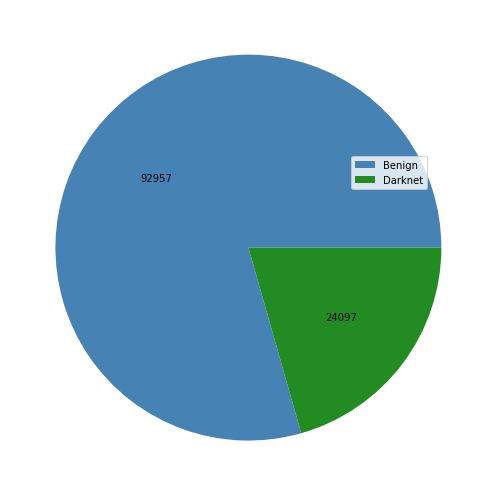

In [16]:
d1 = samples.groupby("Label").count()
fig, ax = plt.subplots(figsize=(7,7))
d1.head()
plt.pie(d1["Flow ID"], shadow=False,
         autopct=lambda x: int(d1["Label.1"].values.sum()*x/100), colors=["#4682B4","#228B22"])
plt.legend(["Benign", "Darknet"], bbox_to_anchor=(0.43,0.3,0.45,0.4),framealpha=0.8)
plt.tight_layout()
plt.show()

In [17]:
samples.describe(include='all')

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
count,117056,117056,117056.000000,117056,117056.000000,117056.000000,117056,1.170560e+05,117056.000000,117056.000000,1.170560e+05,1.170560e+05,117056.000000,117056.000000,117056.000000,117056.000000,117056.000000,117056.000000,117056.000000,117056.000000,1.170560e+05,1.170560e+05,1.170560e+05,1.170560e+05,1.170560e+05,1.170560e+05,1.170560e+05,1.170560e+05,1.170560e+05,1.170560e+05,1.170560e+05,1.170560e+05,1.170560e+05,1.170560e+05,1.170560e+05,1.170560e+05,117056.000000,117056.0,117056.0,117056.0,1.170560e+05,1.170560e+05,1.170560e+05,117056.000000,117056.000000,117056.000000,117056.000000,117056.000000,1.170560e+05,117056.000000,117056.000000,117056.000000,117056.000000,117056.000000,117056.0,117056.0,117056.0,117056.000000,117056.000000,117056.000000,117056.000000,117056.0,117056.0,117056.0,117056.0,117056.000000,1.170560e+05,117056.000000,117056.000000,117056.0,117056.000000,117056.000000,117056.000000,117056.000000,117056.000000,117056.0,117056.0,117056.0,117056.0,1.170560e+05,1.170560e+05,1.170560e+05,1.170560e+05,117056,117056
unique,77568,3914,NaN,7197,NaN,NaN,2464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,8
top,8.6.0.1-8.0.6.4-0-0-0,10.152.152.11,NaN,10.152.152.10,NaN,NaN,23-02-2016 14:09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Benign,Browsing
freq,430,59273,NaN,11865,NaN,NaN,1017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92958,32714
mean,NaN,NaN,38336.817797,NaN,14193.148749,10.810638,NaN,1.999155e+07,161.712992,163.723508,1.175879e+05,1.380436e+05,204.582508,17.425916,70.629274,60.214119,251.342178,49.803205,120.465781,69.949791,1.020701e+05,1.189127e+04,2.334567e+06,2.897271e+06,8.873794e+06,7.886088e+05,1.915800e+07,3.770805e+06,2.280575e+06,8.354954e+06,2.358737e+06,1.600763e+07,2.752969e+06,1.908706e+06,6.620450e+06,1.502781e+06,0.084746,0.0,0.0,0.0,3.086254e+03,3.281514e+03,6.990153e+03,4901.113893,16.180503,336.618866,100.550748,112.739571,5

In [18]:
hours = []
for timestamp in samples['Timestamp']:
    hora = int(timestamp.split()[1].split(':')[0])
    hours.append(hora)
samples['hour'] = hours
print(samples[['Timestamp', 'hour']][:5])

          Timestamp  hour
0  24-07-2015 16:09    16
1  24-07-2015 16:09    16
2  24-07-2015 16:09    16
3  24-07-2015 16:09    16
4  24-07-2015 16:09    16


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117056 entries, 0 to 141529
Data columns (total 85 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Flow ID                     117056 non-null  object 
 1   Src IP                      117056 non-null  object 
 2   Src Port                    117056 non-null  int64  
 3   Dst IP                      117056 non-null  object 
 4   Dst Port                    117056 non-null  int64  
 5   Protocol                    117056 non-null  int64  
 6   Timestamp                   117056 non-null  object 
 7   Flow Duration               117056 non-null  int64  
 8   Total Fwd Packet            117056 non-null  int64  
 9   Total Bwd packets           117056 non-null  int64  
 10  Total Length of Fwd Packet  117056 non-null  int64  
 11  Total Length of Bwd Packet  117056 non-null  int64  
 12  Fwd Packet Length Max       117056 non-null  int64  
 13  Fwd Packet Len

In [20]:
da=samples.copy()

### Preprocessing Data

In [21]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
da['Flow ID']=number.fit_transform(da['Flow ID'])
da['Src IP']=number.fit_transform(da['Src IP'])
da['Dst IP']=number.fit_transform(da['Dst IP'])
da['Timestamp']=number.fit_transform(da['Timestamp'])
da['Label']=number.fit_transform(da['Label'])
da['Label.1']=number.fit_transform(da['Label.1'])
da.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117056 entries, 0 to 141529
Data columns (total 86 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Flow ID                     117056 non-null  int32  
 1   Src IP                      117056 non-null  int32  
 2   Src Port                    117056 non-null  int64  
 3   Dst IP                      117056 non-null  int32  
 4   Dst Port                    117056 non-null  int64  
 5   Protocol                    117056 non-null  int64  
 6   Timestamp                   117056 non-null  int32  
 7   Flow Duration               117056 non-null  int64  
 8   Total Fwd Packet            117056 non-null  int64  
 9   Total Bwd packets           117056 non-null  int64  
 10  Total Length of Fwd Packet  117056 non-null  int64  
 11  Total Length of Bwd Packet  117056 non-null  int64  
 12  Fwd Packet Length Max       117056 non-null  int64  
 13  Fwd Packet Len

In [22]:
float_col = df.select_dtypes(include=['float64'])
for col in float_col.columns.values:
    df[col] = df[col].astype('int64')

In [23]:
da.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117056 entries, 0 to 141529
Data columns (total 86 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Flow ID                     117056 non-null  int32  
 1   Src IP                      117056 non-null  int32  
 2   Src Port                    117056 non-null  int64  
 3   Dst IP                      117056 non-null  int32  
 4   Dst Port                    117056 non-null  int64  
 5   Protocol                    117056 non-null  int64  
 6   Timestamp                   117056 non-null  int32  
 7   Flow Duration               117056 non-null  int64  
 8   Total Fwd Packet            117056 non-null  int64  
 9   Total Bwd packets           117056 non-null  int64  
 10  Total Length of Fwd Packet  117056 non-null  int64  
 11  Total Length of Bwd Packet  117056 non-null  int64  
 12  Fwd Packet Length Max       117056 non-null  int64  
 13  Fwd Packet Len

### Plotting Graphs

In [24]:
import seaborn as sns

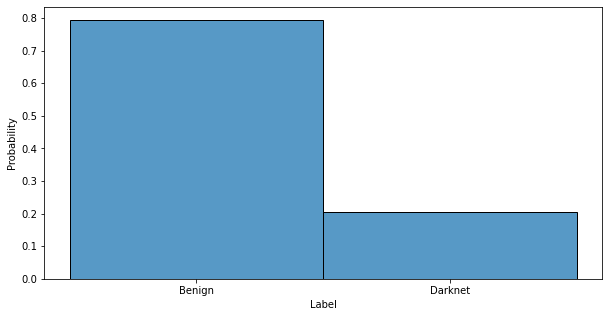

In [25]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=samples, x="Label", stat="probability")
plt.show()

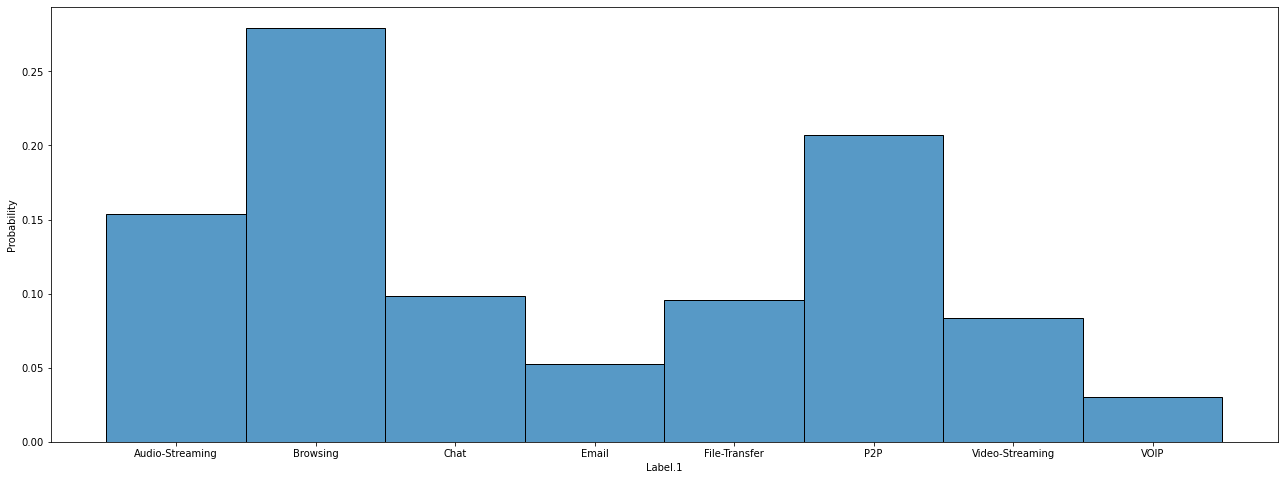

In [26]:
fig, ax = plt.subplots(figsize=(22,8))
sns.histplot(data=samples, x="Label.1", stat="probability")
plt.show()

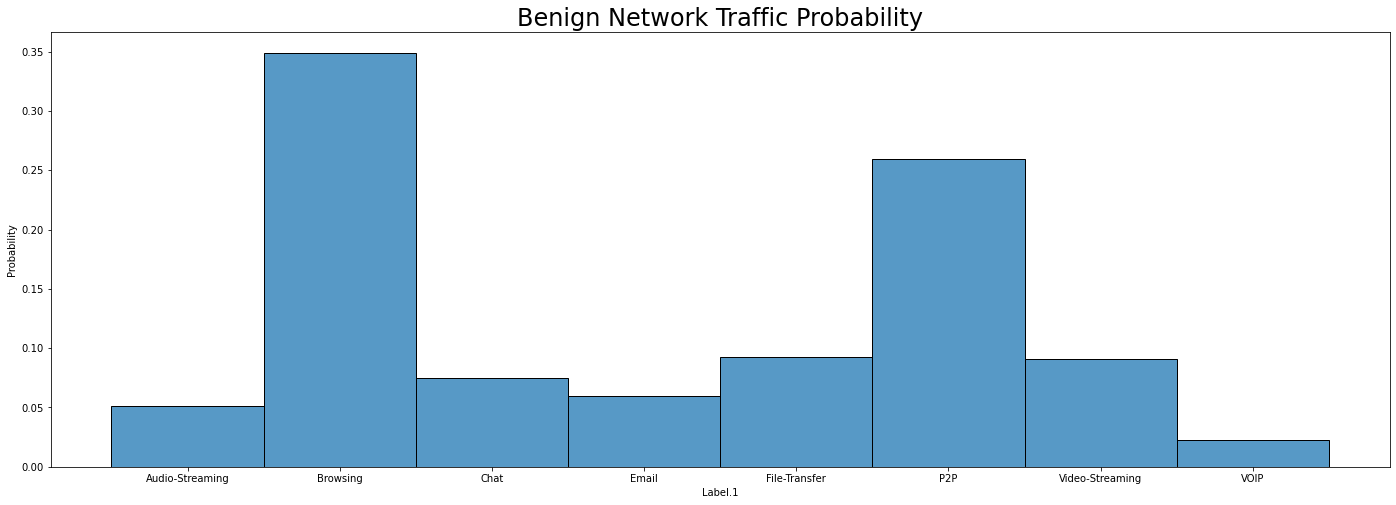

In [27]:
fig, ax = plt.subplots(figsize=(24,8))
sns.histplot(data=samples[samples['Label'] == "Benign"], x="Label.1", stat="probability")
ax.set_title( "Benign Network Traffic Probability" , size = 24 )
plt.show()

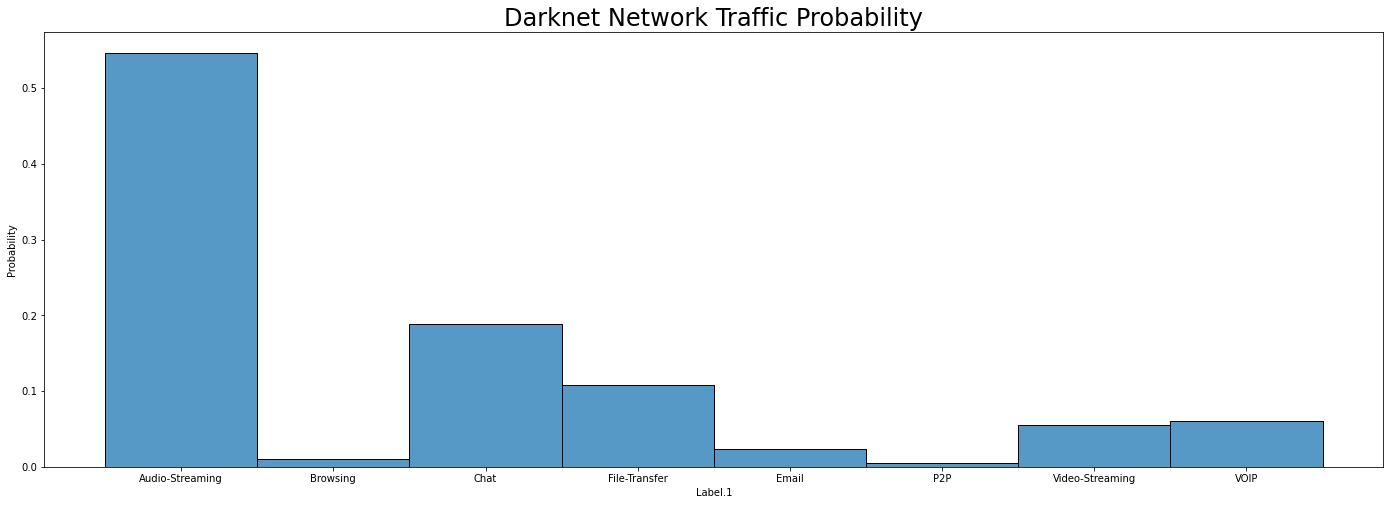

In [28]:
fig, ax = plt.subplots(figsize=(24,8))
sns.histplot(data=samples[samples['Label'] == "Darknet"], x="Label.1", stat="probability")
ax.set_title("Darknet Network Traffic Probability", size = 24 )
plt.show()

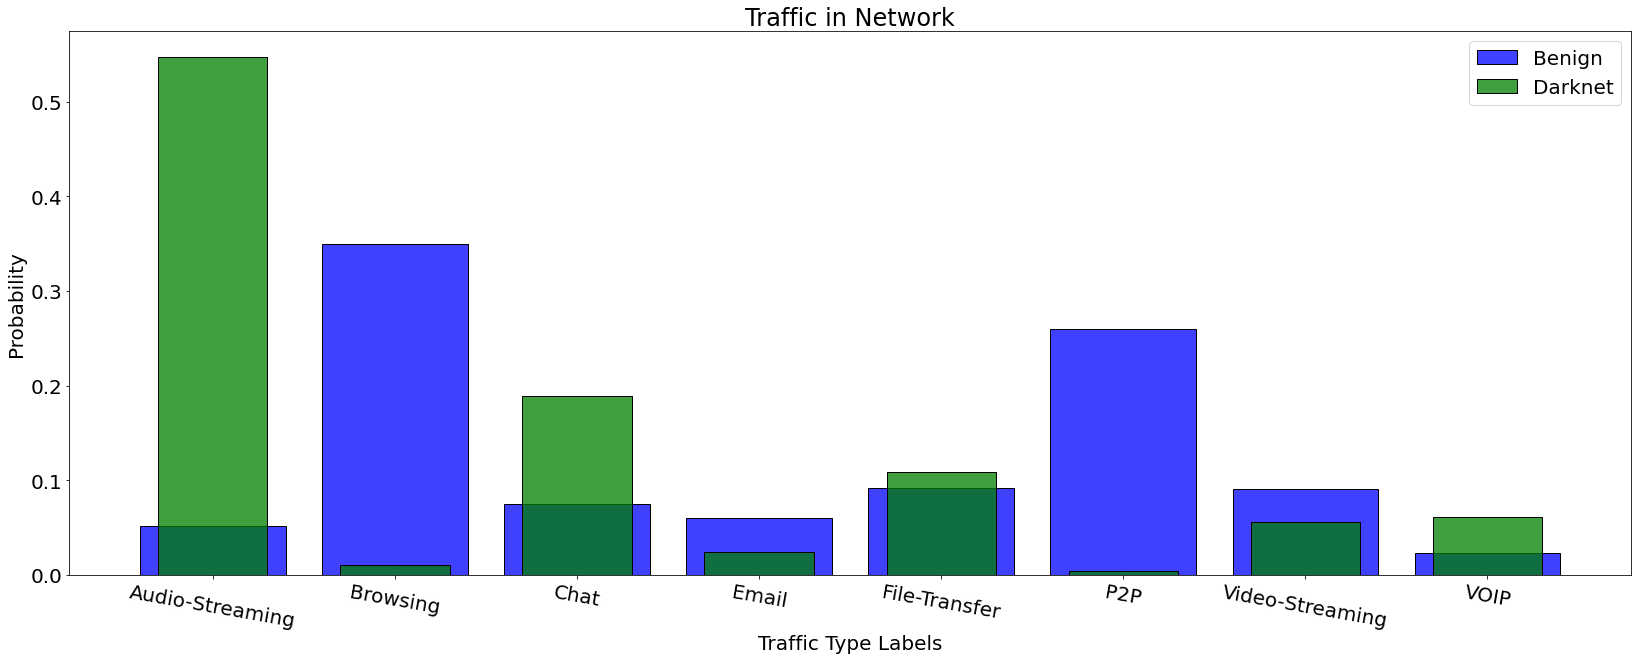

In [29]:
plt.rcParams.update({'font.size': 20})

fig,ax=plt.subplots(figsize=(28,10))
sns.histplot(data=samples[samples['Label'] == "Benign"], x="Label.1", stat="probability",shrink=0.8 ,label="Benign", color='b')
sns.histplot(data=samples[samples['Label'] == "Darknet"], x="Label.1", stat="probability",shrink=0.6, label="Darknet", color="g")
plt.xlabel("Traffic Type Labels")
plt.ylabel("Probability")
ax.set_title( "Traffic in Network" , size = 24 )
plt.legend()
plt.xticks(rotation=-10)
plt.show()

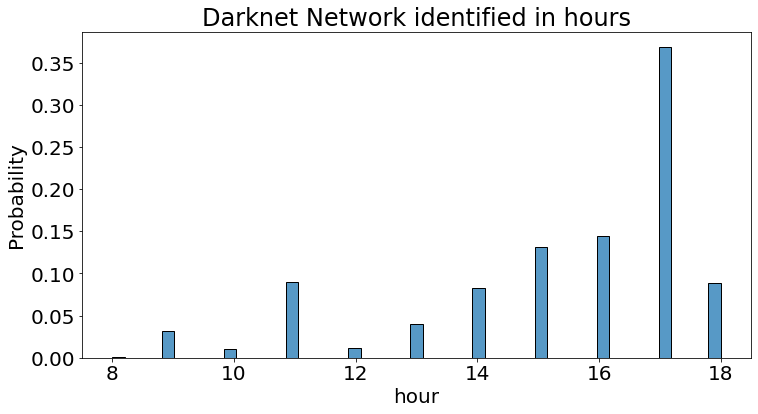

In [30]:
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(data=samples[samples['Label'] == "Darknet"], x="hour", stat="probability")
ax.set_title("Darknet Network identified in hours" , size = 24)
plt.show()

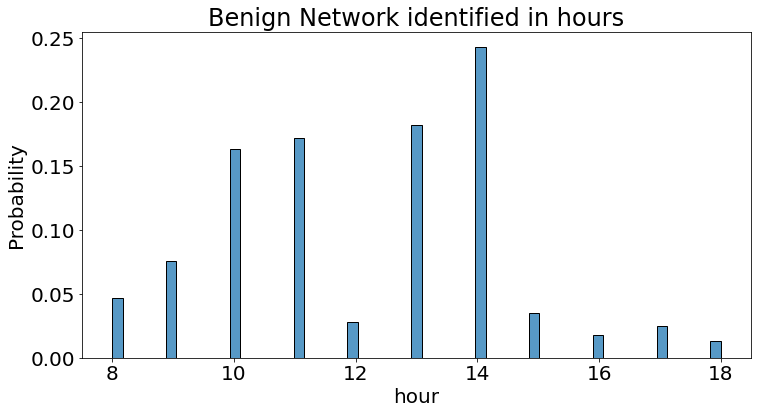

In [31]:
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(data=samples[samples['Label'] == "Benign"], x="hour", stat="probability")
ax.set_title("Benign Network identified in hours" , size = 24)
plt.show()

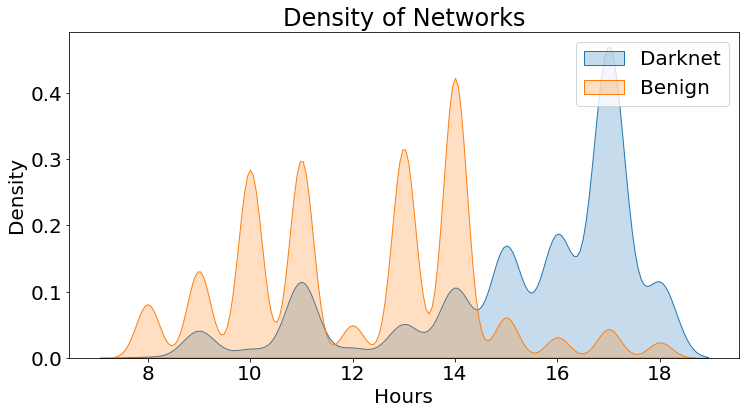

In [32]:
fig, ax = plt.subplots(figsize=(12,6))
plot_graph_darknet = samples[samples['Label'] == "Darknet"]
plot_graph_benign = samples[samples['Label'] == "Benign"]
sns.kdeplot(plot_graph_darknet['hour'], shade=True)
sns.kdeplot(plot_graph_benign['hour'], shade=True)
plt.xlabel("Hours")
plt.ylabel("Density")
ax.set_title("Density of Networks" , size = 24)
plt.legend(['Darknet', 'Benign'])
plt.show()

In [33]:
da.to_csv( 'Darknet_processed.csv', index=False)